Binary classification of problem of students graduating or dropping out
Algorithm: Naïve Bayes
Author: Demetreous Stillman

In [50]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [51]:
# Load the CSV file into a dataFrame
df_with_enrolled = pd.read_csv("/Users/demetreousstillman/Desktop/CSE_5160_Project/dropout_data.csv", sep=";")

# Filter rows where the 'Target' column is not equal to 'Enrolled'
df = df_with_enrolled[df_with_enrolled['Target'] != 'Enrolled']

# Define a mapping dictionary to convert categories to numerical values
target_mapping = {'Graduate': 0, 'Dropout': 1}
# Use the mapping dictionary to replace values in the "Target" column
df['Target'] = df['Target'].replace(target_mapping)

# X contains all columns except the "Target" column
X = df.drop("Target", axis=1) 
# y contains only the "Target" column
y = df["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/9g/2y_gmxqn22l8hl960qphhhmw0000gn/T/ipykernel_40155/3298502298.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].replace(target_mapping)


In [52]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)

In [53]:
scores = cross_val_score(gnb, X_train, y_train, cv=10)
print("Cross Validation Scores Array:")
print(scores)
print("\nMean Cross Validation Score:", np.mean(scores))

Cross Validation Scores Array:
[0.83505155 0.85223368 0.83848797 0.83505155 0.84482759 0.85517241
 0.83448276 0.81724138 0.80344828 0.86551724]

Mean Cross Validation Score: 0.8381514397440455


In [54]:
# Evaluate training accuracy
y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
y_test_pred = gnb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8402
Test Accuracy: 0.8457


In [55]:
target_names = ['Graduate', 'Dropout']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.85      0.92      0.88       449
     Dropout       0.85      0.73      0.78       277

    accuracy                           0.85       726
   macro avg       0.85      0.82      0.83       726
weighted avg       0.85      0.85      0.84       726



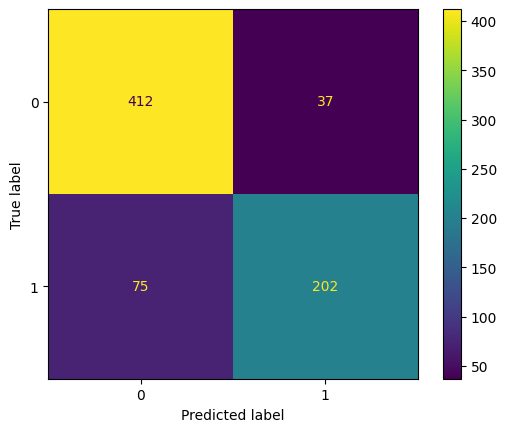

In [56]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
X_train

In [57]:
# Check for negative values in X_train
neg_indices = np.where(X_train < 0)
print("Indices of negative values in X_train:", neg_indices)

Indices of negative values in X_train: (array([   4,    4,    6, ..., 2899, 2900, 2900]), array([34, 35, 34, ..., 35, 34, 35]))


In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [89]:
cnb = ComplementNB()
cnb.fit(X_train_scaled, y_train)
y_cnb_pred = cnb.predict(X_test_scaled)

In [90]:
scores = cross_val_score(cnb, X_train_scaled, y_train, cv=10)
print("Cross Validation Scores Array:")
print(scores)
print("\nMean Cross Validation Score:", np.mean(scores))

Cross Validation Scores Array:
[0.80756014 0.83848797 0.81443299 0.80412371 0.82758621 0.79655172
 0.82068966 0.78275862 0.8        0.84482759]

Mean Cross Validation Score: 0.8137018604100013


In [91]:
# Evaluate training accuracy
y_train_pred = cnb.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
y_test_pred = cnb.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8161
Test Accuracy: 0.8223


In [62]:
target_names = ['Graduate', 'Dropout']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.86      0.85      0.85       449
     Dropout       0.76      0.78      0.77       277

    accuracy                           0.82       726
   macro avg       0.81      0.81      0.81       726
weighted avg       0.82      0.82      0.82       726



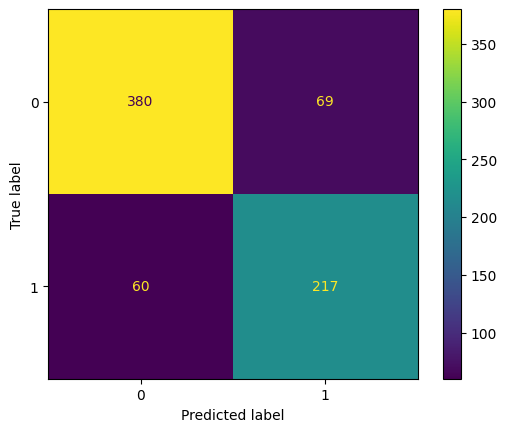

In [63]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Create the CNB model
cnb = ComplementNB()

# Perform grid search
grid_search = GridSearchCV(cnb, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

In [ ]:
from sklearn.model_selection import cross_val_score

# Create CNB model with best alpha
best_cnb = ComplementNB(alpha=best_alpha)

# Perform cross-validation
#cv_scores = cross_val_score(best_cnb, X_train_scaled, y_train, cv=5)

scores = cross_val_score(best_cnb, X_train_scaled, y_train, cv=10)
print("Cross Validation Scores Array:")
print(scores)
print("\nMean Cross Validation Score:", np.mean(scores))

best_cnb.fit(X_train_scaled, y_train)

# Evaluate training accuracy
y_train_pred = best_cnb.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
y_test_pred = best_cnb.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")